# **Importar dataframe de Google Drive**

In [156]:
# Incluir definición de parámetros
%run -i '/content/drive/MyDrive/TFM/0.config.py'

Usando DS_FILE       : /content/drive/MyDrive/TFM/etherdata-MINUTE-2021-09-01-2021-11-30.csv
Usando DS_FILE_CLEAN : /content/drive/MyDrive/TFM/etherdata-MINUTE-2021-09-01-2021-11-30-CLEAN.csv


<Figure size 640x480 with 0 Axes>

In [157]:
# Importaciones
from google.colab import auth
from google.cloud import bigquery

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from scipy import stats

print(tf.__version__)


2.7.0


In [158]:
# Cargar Dataframe de Google Drive
df_org   = pd.read_csv(DS_FILE)
df_clean = pd.read_csv(DS_FILE_CLEAN)


In [159]:
# Corregir datos cargados

# Convertir blk_timestamp de  tipo object a timestamp
df_org['time'] =  df_org['time'].apply (pd.to_datetime)

# Eliminar columna 'Unnamed: 0'
df_org=df_org.drop(columns=['Unnamed: 0'])

In [160]:
# Convertir blk_timestamp de  tipo object a timestamp
df_clean['time'] =  df_clean['time'].apply (pd.to_datetime)

# Eliminar columna 'Unnamed: 0'
df_clean=df_clean.drop(columns=['Unnamed: 0'])

# **Revisar Datos cargados**

In [161]:
# Buscar filas con datos faltantes
df_org.isna().sum()

time                      0
avg_gas_price            11
min_gas_price            11
max_gas_price            11
avg_base_fee_per_gas      0
avg_difficulty            0
avg_gas_limit             0
avg_gas_used              0
avg_size                  0
avg_transaction_count     0
sum_tx_ether             11
num_blk                   0
num_trn                  11
dtype: int64

In [162]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129727 entries, 0 to 129726
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   time                   129727 non-null  datetime64[ns, UTC]
 1   avg_gas_price          129716 non-null  float64            
 2   min_gas_price          129716 non-null  float64            
 3   max_gas_price          129716 non-null  float64            
 4   avg_base_fee_per_gas   129727 non-null  float64            
 5   avg_difficulty         129727 non-null  float64            
 6   avg_gas_limit          129727 non-null  float64            
 7   avg_gas_used           129727 non-null  float64            
 8   avg_size               129727 non-null  float64            
 9   avg_transaction_count  129727 non-null  float64            
 10  sum_tx_ether           129716 non-null  float64            
 11  num_blk                129727 non-null 

In [163]:
df_org.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_gas_price,129716.0,1.264246e+02,1.766149e+02,3.123343e+01,8.177163e+01,1.120963e+02,1.489301e+02,4.936640e+04
min_gas_price,129716.0,9.980102e+01,7.194226e+01,2.201610e+01,6.428106e+01,8.963541e+01,1.208030e+02,7.000000e+03
max_gas_price,129716.0,2.109894e+03,1.480164e+05,5.600000e+01,3.332493e+02,6.116972e+02,1.397748e+03,5.324367e+07
avg_base_fee_per_gas,129727.0,1.074330e+02,6.739605e+01,2.381943e+01,6.972630e+01,9.698417e+01,1.301894e+02,3.574540e+03
avg_difficulty,129727.0,9.825388e+15,8.617806e+14,8.105268e+15,9.085708e+15,9.644141e+15,1.056608e+16,1.198155e+16
avg_gas_limit,129727.0,3.000432e+07,3.303376e+04,2.982056e+07,2.999267e+07,3.000325e+07,3.001465e+07,3.025857e+07
avg_gas_used,129727.0,1.680318e+07,5.208958e+06,0.000000e+00,1.323702e+07,1.555189e+07,1.897422e+07,3.019604e+07
avg_size,129727.0,8.132584e+01,3.182305e+01,5.340000e-01,5.998020e+01,7.409940e+01,9.521883e+01,8.072114e+02
avg_transaction_count,129727.0,2.157544e+02,8.368633e+01,0.000000e+00,1.605714e+02,1.960000e+02,2.487500e+02,1.424000e+03
sum_tx_ether,129716.0,1.404892e+03,6.788365e+03,0.000000e+00,3.318441e+02,5.845020e+02,1.156248e+03,1.000184e+06


In [164]:
df_clean.isna().sum()

avg_gas_price            0
min_gas_price            0
max_gas_price            0
avg_base_fee_per_gas     0
avg_difficulty           0
avg_gas_limit            0
avg_gas_used             0
avg_size                 0
avg_transaction_count    0
sum_tx_ether             0
num_blk                  0
num_trn                  0
time                     0
dtype: int64

In [165]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120672 entries, 0 to 120671
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   avg_gas_price          120672 non-null  float64            
 1   min_gas_price          120672 non-null  float64            
 2   max_gas_price          120672 non-null  float64            
 3   avg_base_fee_per_gas   120672 non-null  float64            
 4   avg_difficulty         120672 non-null  float64            
 5   avg_gas_limit          120672 non-null  float64            
 6   avg_gas_used           120672 non-null  float64            
 7   avg_size               120672 non-null  float64            
 8   avg_transaction_count  120672 non-null  float64            
 9   sum_tx_ether           120672 non-null  float64            
 10  num_blk                120672 non-null  int64              
 11  num_trn                120672 non-null 

# **Visualizar Datos en bruto**

In [166]:
# Recuperar df
df = df_org

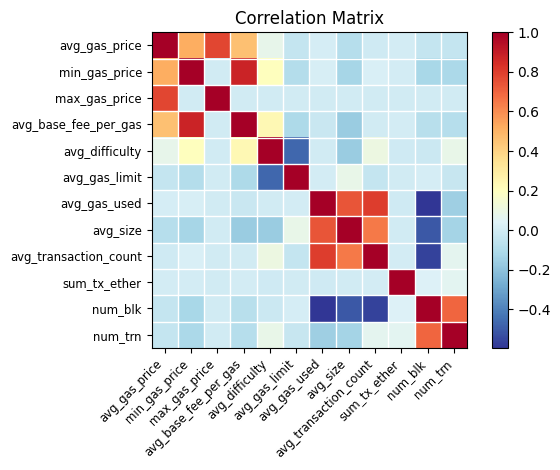

In [167]:
import statsmodels.api as sm
plt.style.use('default')

corr = df.set_index('time').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

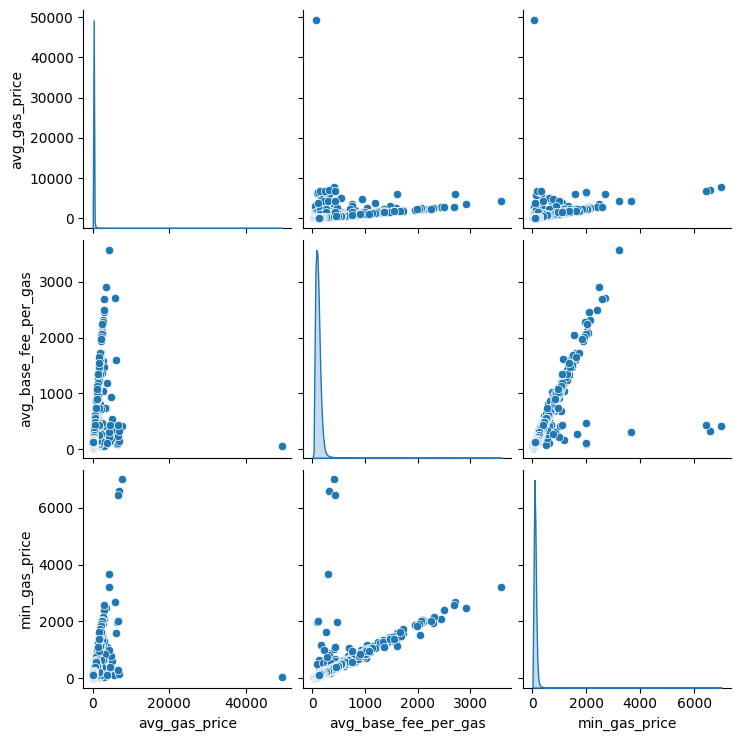

In [168]:
sns.pairplot(df[["avg_gas_price", "avg_base_fee_per_gas", "min_gas_price"]], diag_kind="kde")

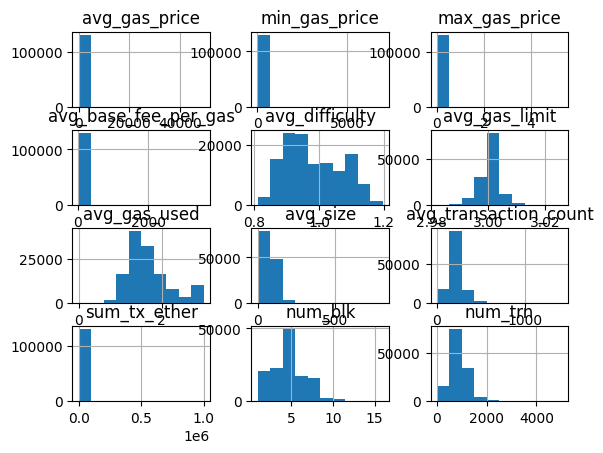

In [169]:
plt.style.use('default')
df.hist()
plt.show()

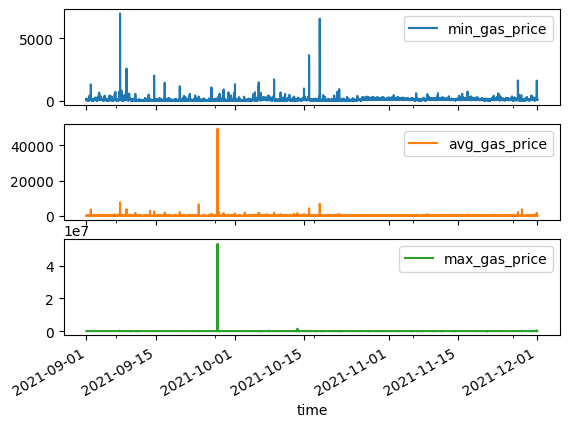

In [170]:
# Graficas 
plt.style.use('default')

plot_cols = ['min_gas_price', 'avg_gas_price', 'max_gas_price']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


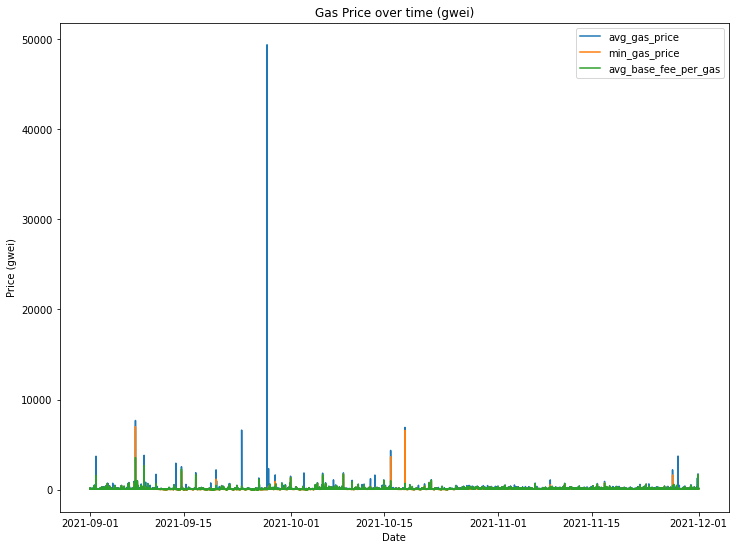

In [171]:
# Grafica
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, g = plt.subplots(figsize=(12, 9))
g = sns.lineplot(x="time", y="avg_gas_price", label="avg_gas_price", data=df, palette="Blues_d")
g = sns.lineplot(x="time", y="min_gas_price", label="min_gas_price", data=df, palette="Blues_d")
#g = sns.lineplot(x="time", y="max_gas_price", label="max_gas_price", data=df, palette="Blues_d")
g = sns.lineplot(x="time", y="avg_base_fee_per_gas", label="avg_base_fee_per_gas", data=df, palette="Blues_d")
plt.title("Gas Price over time (gwei)")
plt.xlabel("Date")
plt.ylabel("Price (gwei)")
plt.show(g,f)


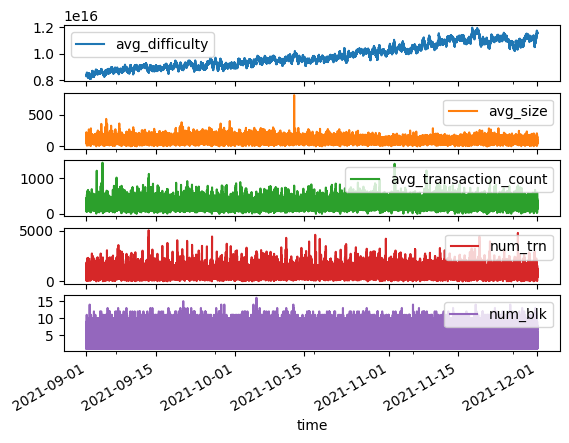

In [172]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_difficulty', 'avg_size', 'avg_transaction_count', 'num_trn', 'num_blk']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


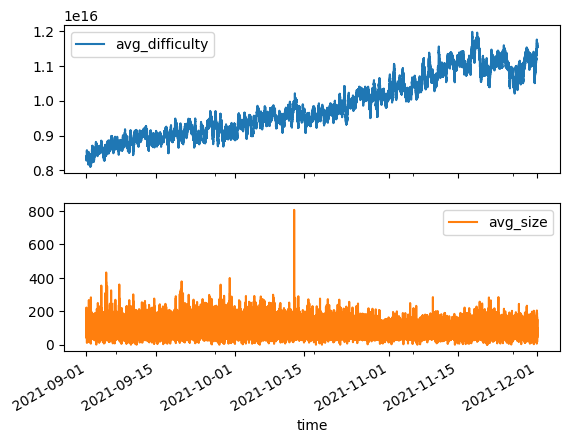

In [173]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_difficulty', 'avg_size']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


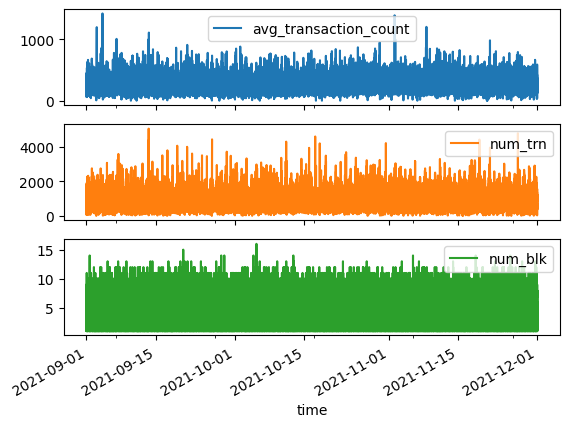

In [174]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_transaction_count', 'num_trn', 'num_blk']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)

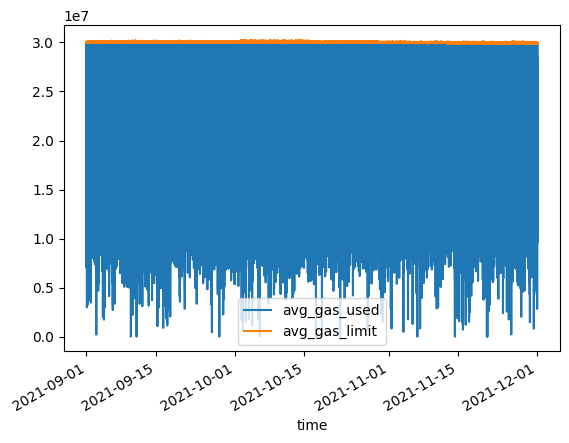

In [175]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_gas_used', 'avg_gas_limit']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=False)


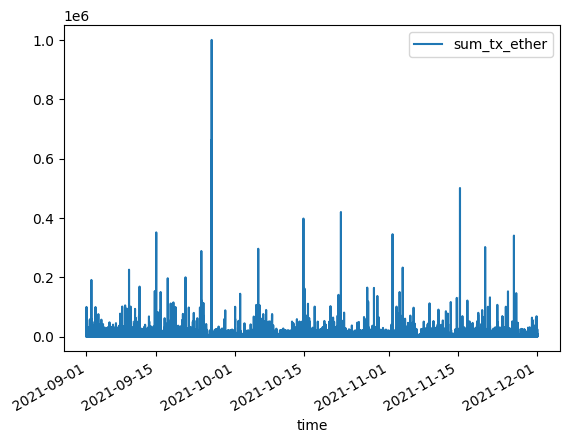

In [176]:
# Graficas 
plt.style.use('default')

plot_cols = ['sum_tx_ether']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=False)


### Analisis de Fourier

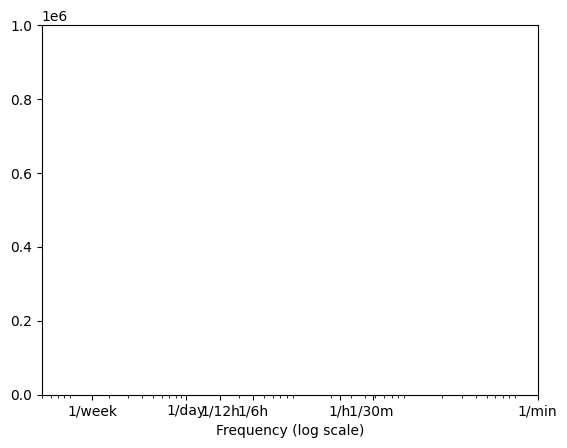

In [177]:
plt.style.use('default')

fft = tf.signal.rfft(df['min_gas_price'])
f_per_dataset = np.arange(0, len(fft))
n_samples = len(df['avg_gas_price'])

# Calcular la frecuencia por día
if TIME_PREFIX == 'HOUR': 
  days_per_dataset = n_samples / 24
  f_per_day = f_per_dataset / days_per_dataset

elif TIME_PREFIX == '5MINUTE': 
  days_per_dataset = n_samples / (24*12)
  f_per_day = f_per_dataset / days_per_dataset

elif TIME_PREFIX == 'MINUTE': 
  days_per_dataset = n_samples / (24*60)
  f_per_day = f_per_dataset / days_per_dataset

else:
  print ('Error')

plt.step(f_per_day, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1e6)
plt.xlim([0.05, max(plt.xlim())])
plt.xticks([1/7, 1, 2, 4, 24, 24*2,  24*60 ], labels=['1/week','1/day', '1/12h', '1/6h', '1/h', '1/30m ', '1/min'])
#plt.xticks([1/7, 1, 2, 4, 24 ], labels=['1/week','1/day', '1/12h', '1/6h', '1/h'])
_ = plt.xlabel('Frequency (log scale)')

# **Visualizar Datos Limpios**

In [178]:
# Recuperar df
df = df_clean

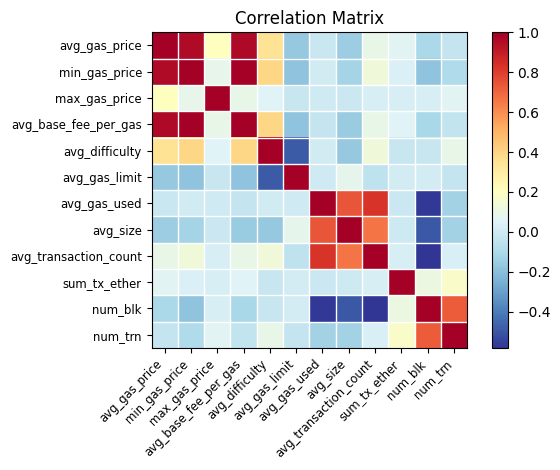

In [179]:
import statsmodels.api as sm
plt.style.use('default')

corr = df.set_index('time').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

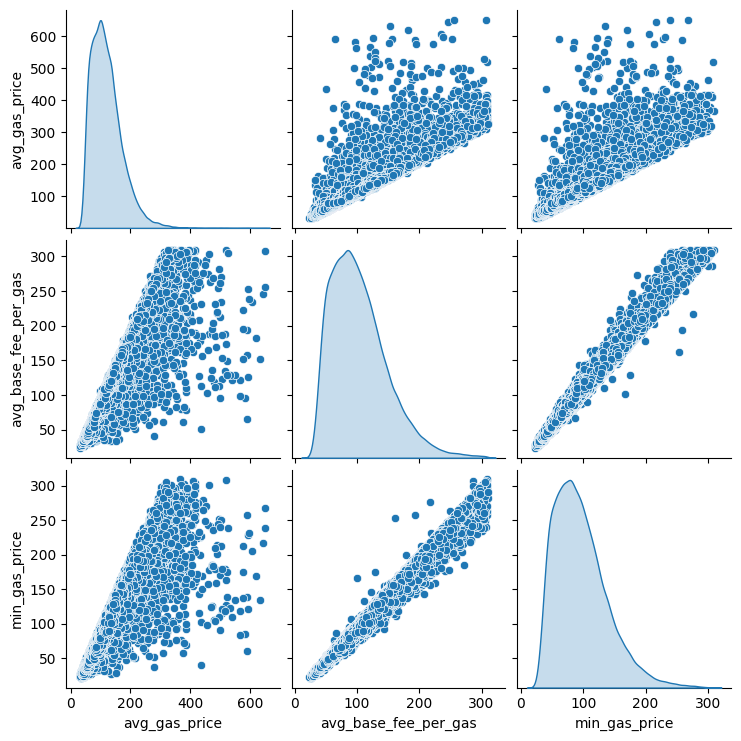

In [180]:
sns.pairplot(df[["avg_gas_price", "avg_base_fee_per_gas", "min_gas_price"]], diag_kind="kde")

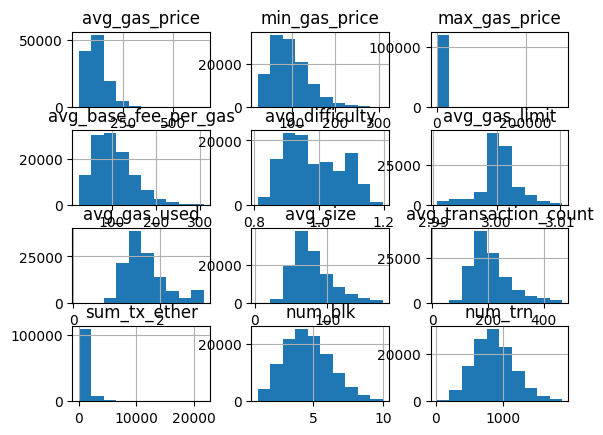

In [181]:
plt.style.use('default')
df.hist()
plt.show()

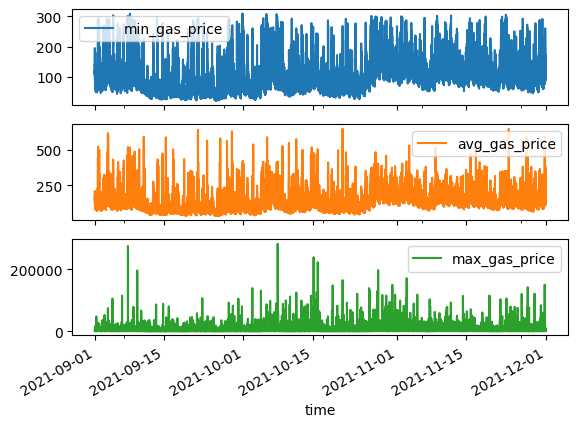

In [182]:
# Graficas 
plt.style.use('default')

plot_cols = ['min_gas_price', 'avg_gas_price', 'max_gas_price']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


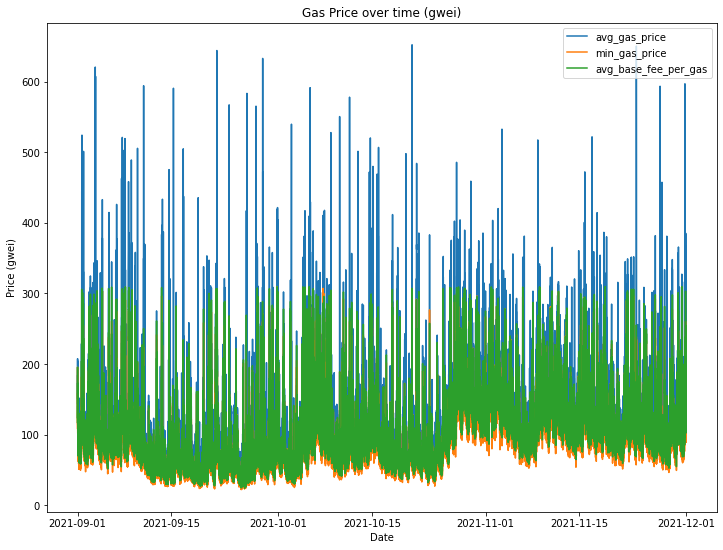

In [183]:
# Grafica
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, g = plt.subplots(figsize=(12, 9))
g = sns.lineplot(x="time", y="avg_gas_price", label="avg_gas_price", data=df, palette="Blues_d")
g = sns.lineplot(x="time", y="min_gas_price", label="min_gas_price", data=df, palette="Blues_d")
#g = sns.lineplot(x="time", y="max_gas_price", label="max_gas_price", data=df, palette="Blues_d")
g = sns.lineplot(x="time", y="avg_base_fee_per_gas", label="avg_base_fee_per_gas", data=df, palette="Blues_d")
plt.title("Gas Price over time (gwei)")
plt.xlabel("Date")
plt.ylabel("Price (gwei)")
plt.show(g,f)


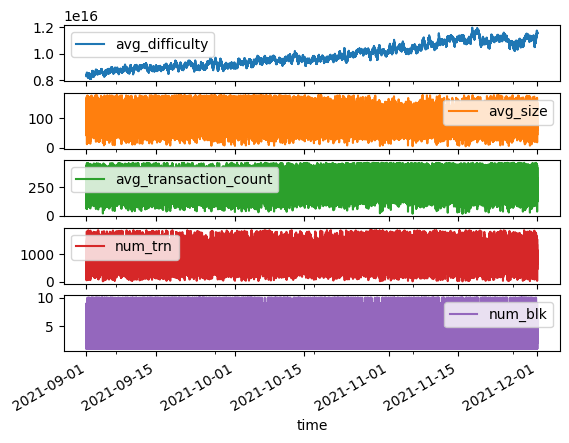

In [184]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_difficulty', 'avg_size', 'avg_transaction_count', 'num_trn', 'num_blk']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


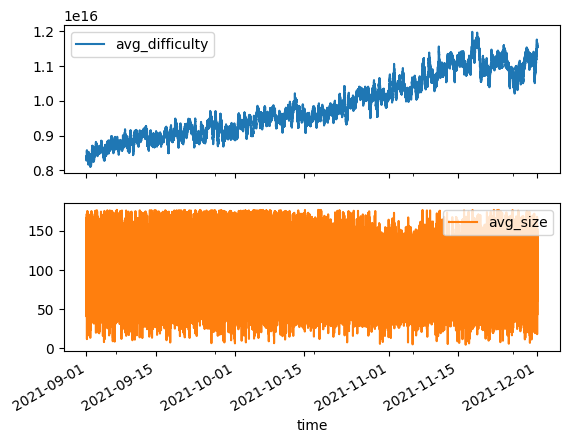

In [185]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_difficulty', 'avg_size']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)


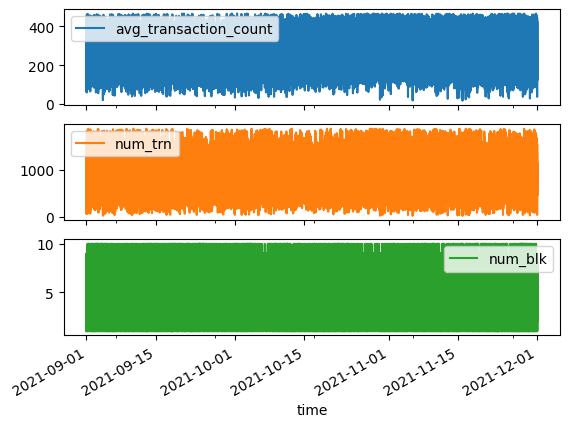

In [186]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_transaction_count', 'num_trn', 'num_blk']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=True)

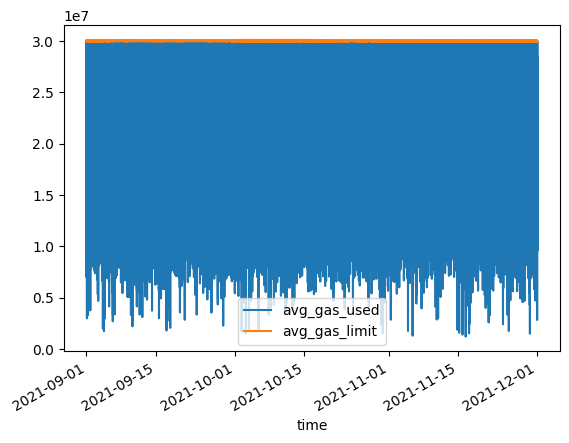

In [187]:
# Graficas 
plt.style.use('default')

plot_cols = ['avg_gas_used', 'avg_gas_limit']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=False)


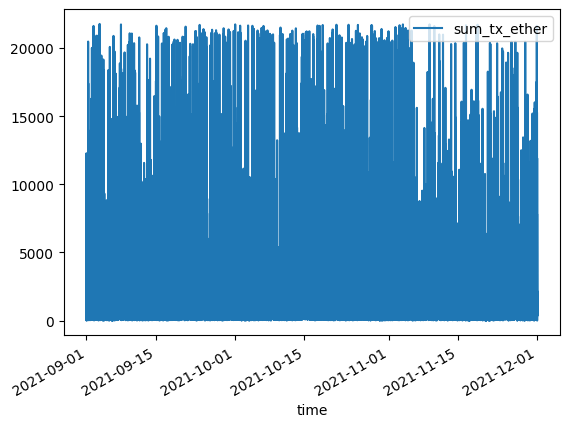

In [188]:
# Graficas 
plt.style.use('default')

plot_cols = ['sum_tx_ether']
plot_features = df[plot_cols]
plot_features.index = df['time']
_ = plot_features.plot(subplots=False)


# **Analisis de Fourier**

In [189]:
# Preservamos el df original
df = df_clean

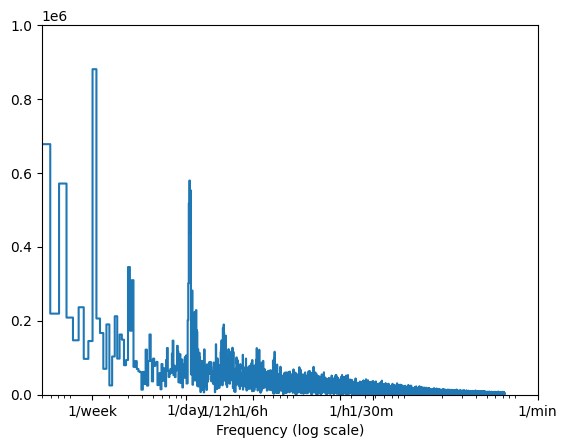

In [190]:
plt.style.use('default')

fft = tf.signal.rfft(df['min_gas_price'])
f_per_dataset = np.arange(0, len(fft))
n_samples = len(df['avg_gas_price'])

# Calcular la frecuencia por día
if TIME_PREFIX == 'HOUR': 
  days_per_dataset = n_samples / 24
  f_per_day = f_per_dataset / days_per_dataset

elif TIME_PREFIX == '5MINUTE': 
  days_per_dataset = n_samples / (24*12)
  f_per_day = f_per_dataset / days_per_dataset

elif TIME_PREFIX == 'MINUTE': 
  days_per_dataset = n_samples / (24*60)
  f_per_day = f_per_dataset / days_per_dataset

else:
  print ('Error')

plt.step(f_per_day, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1e6)
plt.xlim([0.05, max(plt.xlim())])
plt.xticks([1/7, 1, 2, 4, 24, 24*2,  24*60 ], labels=['1/week','1/day', '1/12h', '1/6h', '1/h', '1/30m ', '1/min'])
#plt.xticks([1/7, 1, 2, 4, 24 ], labels=['1/week','1/day', '1/12h', '1/6h', '1/h'])
_ = plt.xlabel('Frequency (log scale)')